# Convolutional Neural Network Architecture

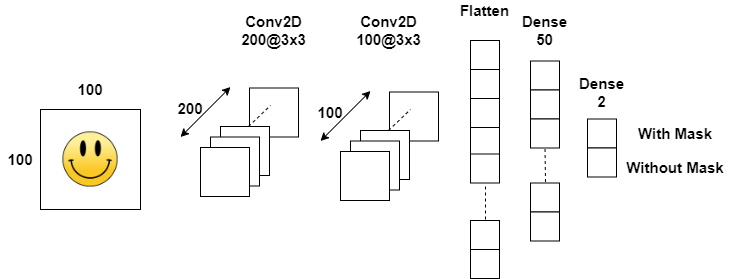

In [1]:
import numpy as np
import tensorflow as tf

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [20]:
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
# from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

model=Sequential()

mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=data.shape[1:])
for layer in mobilenet.layers[:]:
    layer.trainable = False

model.add(mobilenet)

#model.add(Conv2D(200,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

#model.add(Conv2D(100,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(2))
model.add(layers.Activation('softmax'))

# model.add(Dropout(0.5))
# #Flatten layer to stack the output convolutions from second convolution layer
# model.add(Dense(50,activation='relu'))
# #Dense layer of 64 neurons
# model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0003),metrics=['accuracy'])

In [21]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [22]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


history=model.fit(train_data,train_target,epochs=500,validation_split=0.2)

=========] - 1s 799us/sample - loss: 0.0047 - accuracy: 0.9970 - val_loss: 0.1610 - val_accuracy: 0.9597
Epoch 368/500
990/990 [==============================] - 1s 782us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9435
Epoch 369/500
990/990 [==============================] - 1s 790us/sample - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.1601 - val_accuracy: 0.9637
Epoch 370/500
990/990 [==============================] - 1s 822us/sample - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.1451 - val_accuracy: 0.9677
Epoch 371/500
990/990 [==============================] - 1s 819us/sample - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1957 - val_accuracy: 0.9597
Epoch 372/500
990/990 [==============================] - 1s 857us/sample - loss: 9.8967e-04 - accuracy: 1.0000 - val_loss: 0.2075 - val_accuracy: 0.9556
Epoch 373/500
990/990 [==============================] - 1s 789us/sample - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.2161 - val_accuracy: 0.95

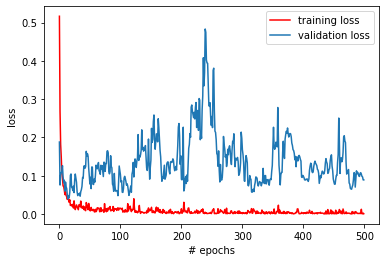

In [26]:
import matplotlib
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
model.save('initialdatasettrained.h5')


In [28]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


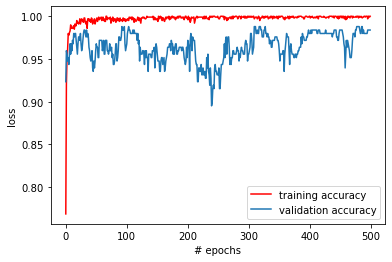

In [29]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 4ms/sample - loss: 0.1398 - accuracy: 0.9710
[0.13983335707714592, 0.9710145]
